In [1]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
plt.style.use('ggplot')

## Difference Between Tensor and Python Variable

In [2]:
var = 1.
print("python variable: ", var)
print()

var_tensor = tf.constant(1.)
print("tensor: ", var_tensor)

python variable:  1.0

tensor:  Tensor("Const:0", shape=(), dtype=float32)


In [3]:
with tf.Session() as sess:
    print("透過tensorflow session取得tensor value: ", sess.run(var_tensor))

透過tensorflow session取得tensor value:  1.0


<br/>
<br/>
<br/>
## Simple Regression Example
- Formula: $ Y = 0.5X + 0.3 $

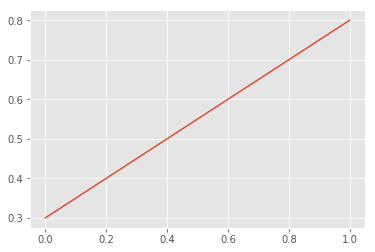

In [4]:
formula = lambda x: 0.5 * x + 0.3
data_x = np.linspace(0, 1, 100)
plt.plot(data_x, formula(data_x))
plt.show()

In [5]:
import tensorflow as tf, numpy as np

n_epoch = 200
learning_rate = 0.5

outerX = np.random.random(10000)
outerY = 0.5 * outerX + 0.3
outerX, outerY

model_dir = "./model/linear"

tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    with tf.variable_scope("inputs"):
        # 接收 outerX data
        placeholderX = tf.placeholder(tf.float32, shape=[None], name="placeholder_x")
        # 接收 outerY data
        placeholderY = tf.placeholder(tf.float32, shape=[None], name="placeholder_y")
        
    with tf.variable_scope("formula"):
        varW = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_w")
        varB = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_b")
        # 公式 0.5X + 0.3, 期望varW會慢慢逼近0.5, varB會慢慢逼近0.3
        varY = varW * placeholderX + varB
        # tensorboard weights logs
        tf.summary.histogram("varW", varW)
        tf.summary.histogram("varB", varB)
    # mean square error
    loss = tf.losses.mean_squared_error(placeholderY, varY)
    # tensorboard weights logs
    tf.summary.scalar("loss", loss)
    # 使用 GradientDescentOptimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    # 最小化 loss, 此時會 backpropagation 去調整 varW, varB的值
    trainer = optimizer.minimize(loss)
    merge = tf.summary.merge_all()
    
    with tf.Session(graph=g) as sess:
        w = tf.summary.FileWriter("./model/linear", sess.graph)
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(n_epoch):
            _, w_, b_ = sess.run([trainer, varW, varB], feed_dict={placeholderX: outerX, placeholderY: outerY})
            print('step: {} varW: {}, varB: {}'.format(i, w_, b_) )
            if (i + 1) % 20 == 0:
                merge_ = sess.run(merge, feed_dict={placeholderX: outerX, placeholderY: outerY})
                w.add_summary(merge_, i)

step: 0 varW: [ 0.11440957], varB: [ 0.02630568]
step: 1 varW: [ 0.37914512], varB: [ 0.49266514]
step: 2 varW: [ 0.32299027], varB: [ 0.3603867]
step: 3 varW: [ 0.35156828], varB: [ 0.38844517]
step: 4 varW: [ 0.35664126], varB: [ 0.3741658]
step: 5 varW: [ 0.36716533], varB: [ 0.37163103]
step: 6 varW: [ 0.37546292], varB: [ 0.36637253]
step: 7 varW: [ 0.38363394], varB: [ 0.36222655]
step: 8 varW: [ 0.39116451], varB: [ 0.35814378]
step: 9 varW: [ 0.39823565], varB: [ 0.35438102]
step: 10 varW: [ 0.4048399], varB: [ 0.35084787]
step: 11 varW: [ 0.41101754], varB: [ 0.34754795]
step: 12 varW: [ 0.41679361], varB: [ 0.34446123]
step: 13 varW: [ 0.4221949], varB: [ 0.34157515]
step: 14 varW: [ 0.4272455], varB: [ 0.33887631]
step: 15 varW: [ 0.43196827], varB: [ 0.33635271]
step: 16 varW: [ 0.43638447], varB: [ 0.33399293]
step: 17 varW: [ 0.440514], varB: [ 0.3317863]
step: 18 varW: [ 0.44437546], varB: [ 0.32972294]
step: 19 varW: [ 0.44798625], varB: [ 0.32779351]
step: 20 varW: [ 0

## Check Tensorboard

In [ ]:
from google.datalab.ml import TensorBoard

tb = TensorBoard()
# stop prev built tensorboard pid
for _, r in tb.list().iterrows(): tb.stop(r.pid)

tb.start(model_dir)
tb.list()

## Stop Tensorboard

In [ ]:
for _, r in tb.list().iterrows(): tb.stop(r.pid)

<br/>
<br/>
<br/>
<br/>
<br/>
## Model Save and Load

In [7]:
import tensorflow as tf, numpy as np

class LinearModel(object):
    def __init__(self):
        """Init graph"""
        tf.reset_default_graph()
        self.graph = tf.Graph()
        with self.graph.as_default():
            with tf.variable_scope("inputs"):
                # 接收 outerX data
                self.placeholderX = tf.placeholder(tf.float32, shape=[None], name="placeholder_x")
                # 接收 outerY data
                self.placeholderY = tf.placeholder(tf.float32, shape=[None], name="placeholder_y")

            with tf.variable_scope("formula"):
                self.varW = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_w")
                self.varB = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_b")
                self.varY = self.varW * self.placeholderX + self.varB
                # tensorboard weights logs
                tf.summary.histogram("varW", self.varW)
                tf.summary.histogram("varB", self.varB)
            # 均方誤差
            self.loss = tf.losses.mean_squared_error(self.placeholderY, self.varY)
            # tensorboard weights logs
            tf.summary.scalar("loss", self.loss)
            # 使用 AdamOptimizer
            self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            # 最小化 loss, 此時會 backpropagation 去調整 varW, varB的值
            self.trainer = self.optimizer.minimize(self.loss)
            self.merge = tf.summary.merge_all()
            # 儲存物件
            self.saver = tf.train.Saver(tf.global_variables())
            
    def load_weight(self, sess, model_dir):
        """load latest saved model"""
        latestCkpt = tf.train.latest_checkpoint(model_dir)
        if latestCkpt:
            self.saver.restore(sess, latestCkpt)
            print("load weight success!")
        return latestCkpt

## Save Model

In [8]:
n_epoch = 200
learning_rate = 0.5

outerX = np.random.random(10000)
outerY = 0.5 * outerX + 0.3
outerX, outerY

model_dir = "./model/linear"

model = LinearModel()
with tf.Session(graph=model.graph) as sess:
    w = tf.summary.FileWriter(model_dir, sess.graph)
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(n_epoch):
        _, w_, b_ = sess.run([model.trainer, model.varW, model.varB], feed_dict={model.placeholderX: outerX, model.placeholderY: outerY})
        print('step: {} varW: {}, varB: {}'.format(i, w_, b_) )
        if (i + 1) % 50 == 0:
            merge_ = sess.run(model.merge, feed_dict={model.placeholderX: outerX, model.placeholderY: outerY})
            w.add_summary(merge_, i)
            
        if (i + 1) % 50 == 0:
            ''' Save model '''
            model.saver.save(sess, save_path=model_dir + "/linear_model", global_step=i)

step: 0 varW: [ 0.35900557], varB: [ 0.79230094]
step: 1 varW: [ 0.15818051], varB: [ 0.37109911]
step: 2 varW: [ 0.23730713], varB: [ 0.47236902]
step: 3 varW: [ 0.23875022], varB: [ 0.43246788]
step: 4 varW: [ 0.25982881], varB: [ 0.43174019]
step: 5 varW: [ 0.27418402], varB: [ 0.4211109]
step: 6 varW: [ 0.28907052], varB: [ 0.413872]
step: 7 varW: [ 0.30259991], varB: [ 0.40636522]
step: 8 varW: [ 0.31536376], varB: [ 0.39954275]
step: 9 varW: [ 0.32727453], varB: [ 0.39310634]
step: 10 varW: [ 0.3384245], varB: [ 0.3871001]
step: 11 varW: [ 0.34885266], varB: [ 0.38147753]
step: 12 varW: [ 0.35860834], varB: [ 0.37621891]
step: 13 varW: [ 0.36773419], varB: [ 0.37129945]
step: 14 varW: [ 0.37627107], varB: [ 0.36669755]
step: 15 varW: [ 0.38425693], varB: [ 0.36239266]
step: 16 varW: [ 0.39172736], varB: [ 0.35836565]
step: 17 varW: [ 0.39871562], varB: [ 0.35459855]
step: 18 varW: [ 0.40525284], varB: [ 0.35107458]
step: 19 varW: [ 0.41136813], varB: [ 0.34777805]
step: 20 varW: 

## Load Model

INFO:tensorflow:Restoring parameters from ./model/linear\linear_model-199
load weight success!


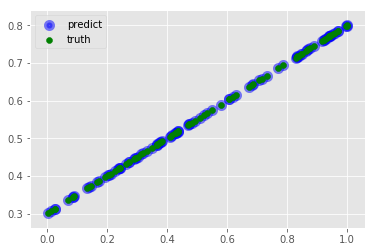

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

model_dir = "./model/linear"
data_x = np.random.random(100)

model = LinearModel()
with tf.Session(graph=model.graph) as sess:
    sess.run(tf.global_variables_initializer())
    ''' load pre-trained weight into model '''
    model.load_weight(sess, model_dir)
    ''' ################################## '''
    
    y = sess.run(model.varY, feed_dict={model.placeholderX: data_x})
    
    ans_y = lambda x: 0.5 * x + 0.3
    f, ax = plt.subplots()
    plt.scatter(data_x, y, label="predict", color="b", linewidth=5, alpha=0.5)
    plt.scatter(data_x, ans_y(data_x), label="truth", color="g")
    plt.legend(loc="best")
    plt.show()

## Observations
1. 上圖可知, 預測的答案跟實際答案是重疊的, 代表Model load success